# Data calculations for analytics

## Dependancies

In [1]:
# pip install scikit-learn
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OneHotEncoder, LabelEncoder
from sklearn import metrics

# pip install tensorflow
import tensorflow as tf
import keras
from keras import layers

#for data analyzing
from ydata_profiling import ProfileReport
from autoviz.AutoViz_Class import AutoViz_Class
import sweetviz as sv
import phik

Imported v0.1.905. Please call AutoViz in this sequence:
    AV = AutoViz_Class()
    %matplotlib inline
    dfte = AV.AutoViz(filename, sep=',', depVar='', dfte=None, header=0, verbose=1, lowess=False,
               chart_format='svg',max_rows_analyzed=150000,max_cols_analyzed=30, save_plot_dir=None)


In [2]:
df = pd.read_csv("../data/dataSynthClean.csv")

In [3]:
df.head()

,Unnamed: 0,Age,isMale,Education,Extraversion Score,Sensing Score,Thinking Score,Judging Score,Personality,Interest_Arts,Interest_Others,Interest_Sports,Interest_Technology
0,0,19.0,1,0,9.47080,7.141434,6.03696,4.360278,ENFP,0,0,0,0
1,1,27.0,0,0,5.85392,6.160195,0.80552,4.221421,ESFP,0,0,1,0
2,2,21.0,0,0,7.08615,3.388433,2.66188,5.127320,ENFP,0,0,0,0
3,3,28.0,1,0,2.01892,4.823624,7.30625,5.986550,INTP,0,1,0,0
4,4,36.0,0,1,9.91703,4.755080,5.31469,4.677213,ENFP,0,0,0,1


Pandas appearantly creates this unneccessary Unnamed: 0 column, let's drop it.

In [4]:
df = df.drop("Unnamed: 0", axis=1)

## Analyzing the data

Before we handle the data, we will analyze if there is anything interesting to note.

### Raw analyzing

#### YData-Profiling

In [5]:
# Generate the data profiling report, title is just 
report = ProfileReport(df, title='Predict Personality Types - Deep Learning course')

# create either an HTML -page or show it straight in the notebook
# sometimes the HTML -page is easier to browse!
report.to_file("html/SynthClean-ydata_data_report.html")
#report.to_notebook_iframe()

Summarize dataset:   0%|          | 0/5 [00:00<?, ?it/s]

Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

Render HTML:   0%|          | 0/1 [00:00<?, ?it/s]

Export report to file:   0%|          | 0/1 [00:00<?, ?it/s]

#### AutoViz

In [6]:
# FOR SUMMARY TABLE:
AV = AutoViz_Class()
report = AV.AutoViz(df)

    Since nrows is smaller than dataset, loading random sample of 150000 rows into pandas...
Shape of your Data Set loaded: (150000, 12)
#######################################################################################
######################## C L A S S I F Y I N G  V A R I A B L E S  ####################
#######################################################################################
Classifying variables in data set...
    Number of Numeric Columns =  5
    Number of Integer-Categorical Columns =  0
    Number of String-Categorical Columns =  1
    Number of Factor-Categorical Columns =  0
    Number of String-Boolean Columns =  0
    Number of Numeric-Boolean Columns =  6
    Number of Discrete String Columns =  0
    Number of NLP String Columns =  0
    Number of Date Time Columns =  0
    Number of ID Columns =  0
    Number of Columns to Delete =  0
    12 Predictors classified...
        No variables removed since no ID or low-information variables found in data se

,Data Type,Missing Values%,Unique Values%,Minimum Value,Maximum Value,DQ Issue
Age,float64,0.000000,NA,18.000000,54.000000,Column has 2475 outliers greater than upper bound (39.00) or lower than lower bound(15.00). Cap them or remove them.
isMale,int64,0.000000,0,0.000000,1.000000,No issue
Education,int64,0.000000,0,0.000000,1.000000,No issue
Extraversion Score,float64,0.000000,NA,0.000160,9.999940,No issue
Sensing Score,float64,0.000000,NA,0.000000,9.788815,Column has 1311 outliers greater than upper bound (9.09) or lower than lower bound(2.46). Cap them or remove them.
Thinking Score,float64,0.000000,NA,0.000760,9.999390,No issue
Judging Score,float64,0.000000,NA,0.000000,9.631116,Column has 2250 outliers greater than upper bound (9.24) or lower than lower bound(1.69). Cap them or remove them.
Personality,object,0.000000,0,,,No issue
Interest_Arts,int64,0.000000,0,0.000000,1.000000,No issue
Interest_Others,int64,0.000000,0,0.000000,1.000000,No issue


Number of All Scatter Plots = 15
All Plots done
Time to run AutoViz = 14 seconds 

 ###################### AUTO VISUALIZATION Completed ########################


In [7]:
# FOR VISUALIZATIONS:
AV = AutoViz_Class()
report = AV.AutoViz(df, chart_format="bokeh", depVar="Personality")

    Since nrows is smaller than dataset, loading random sample of 150000 rows into pandas...
Shape of your Data Set loaded: (150000, 12)
#######################################################################################
######################## C L A S S I F Y I N G  V A R I A B L E S  ####################
#######################################################################################
Classifying variables in data set...
    Number of Numeric Columns =  5
    Number of Integer-Categorical Columns =  0
    Number of String-Categorical Columns =  0
    Number of Factor-Categorical Columns =  0
    Number of String-Boolean Columns =  0
    Number of Numeric-Boolean Columns =  6
    Number of Discrete String Columns =  0
    Number of NLP String Columns =  0
    Number of Date Time Columns =  0
    Number of ID Columns =  0
    Number of Columns to Delete =  0
    11 Predictors classified...
        No variables removed since no ID or low-information variables found in data se

BokehModel(combine_events=True, render_bundle={'docs_json': {'bc1688a2-2bc2-4f25-9fca-4e61664342ab': {'version…

BokehModel(combine_events=True, render_bundle={'docs_json': {'1f963b56-77e1-41e8-ac4d-188326481259': {'version…

BokehModel(combine_events=True, render_bundle={'docs_json': {'ff1a3c58-8e66-4aeb-93ad-03e6a8ab18ed': {'version…

BokehModel(combine_events=True, render_bundle={'docs_json': {'bc055330-31da-449b-bb65-33fc1f8bec8c': {'version…

KDE plot is erroring due to problems with DynamicMaps. Hence it is skipped


BokehModel(combine_events=True, render_bundle={'docs_json': {'44d7d7b5-04ad-4aa8-ab3f-ea99a9a9e9f2': {'version…

No date vars could be found in data set


BokehModel(combine_events=True, render_bundle={'docs_json': {'1ae3c3c7-f2e7-404d-88da-f96976a3c9c0': {'version…

BokehModel(combine_events=True, render_bundle={'docs_json': {'2c96a442-3ee2-4658-a789-bb67eea91091': {'version…

Time to run AutoViz (in seconds) = 26


#### SweetViz

In [8]:
# analyze and create HTML-report
report = sv.analyze(df)
report.show_html('html/SynthClean-sv_report.html')

                                             |          | [  0%]   00:00 -> (? left)

Report html/SynthClean-sv_report.html was generated! NOTEBOOK/COLAB USERS: the web browser MAY not pop up, regardless, the report IS saved in your notebook/colab files.


#### Phik-Matrix

In [9]:
# Calculate the Phik correlation matrix
phik_matrix = df.phik_matrix()

# Display the correlation matrix
phik_matrix

interval columns not set, guessing: ['Age', 'isMale', 'Education', 'Extraversion Score', 'Sensing Score', 'Thinking Score', 'Judging Score', 'Interest_Arts', 'Interest_Others', 'Interest_Sports', 'Interest_Technology']


,Age,isMale,Education,Extraversion Score,Sensing Score,Thinking Score,Judging Score,Personality,Interest_Arts,Interest_Others,Interest_Sports,Interest_Technology
Age,1.000000,0.065440,0.038301,0.058450,0.256435,0.057420,0.054203,0.310780,0.059975,0.050635,0.065168,0.054440
isMale,0.065440,1.000000,0.043981,0.043032,0.064497,0.078825,0.058098,0.225537,0.017865,0.022664,0.017900,0.009646
Education,0.038301,0.043981,1.000000,0.012087,0.050024,0.026555,0.420648,0.635823,0.078181,0.070218,0.073317,0.070539
Extraversion Score,0.058450,0.043032,0.012087,1.000000,0.045854,0.070259,0.041290,0.615288,0.018734,0.031841,0.043995,0.022539
Sensing Score,0.256435,0.064497,0.050024,0.045854,1.000000,0.044055,0.054060,0.611577,0.081153,0.074888,0.109897,0.079578
Thinking Score,0.057420,0.078825,0.026555,0.070259,0.044055,1.000000,0.057435,0.634063,0.047630,0.033702,0.037639,0.021824
Judging Score,0.054203,0.058098,0.420648,0.041290,0.054060,0.057435,1.000000,0.588976,0.100692,0.093023,0.358353,0.093875
Personality,0.310780,0.225537,0.635823,0.615288,0.611577,0.634063,0.588976,1.000000,0.189473,0.172569,0.223637,0.167198
Interest_Arts,0.059975,0.017865,0.078181,0.018734,0.081153,0.047630,0.100692,0.189473,1.000000,0.200651,0.201223,0.184189
Interest_Others,0.050635,0.022664,0.070218,0.031841,0.074888,0.033702,0.093023,0.172569,0.200651,1.000000,0.173643,0.158896


#### Findings

##### Variables to drop

Interestingly enough: Age, isMale and Interest_Sport have increased to above 0.2 in correlation from the Phik-Matrix. This means that they have grown to be more useful in predicting the personality type.<br>
Interest in Arts, Technology or Others all fall below 0.2 though, meaning they will not be very important going forward. Let's keep that in mind for now and compare that to the importance later.

##### Distribution

For the most part, distributions stayed the same, they may have elavated a bit though. While the Introversion Score and the Thinking Score are still perfectly distributed, the same can't be said for Sensing Score and Judging Score.

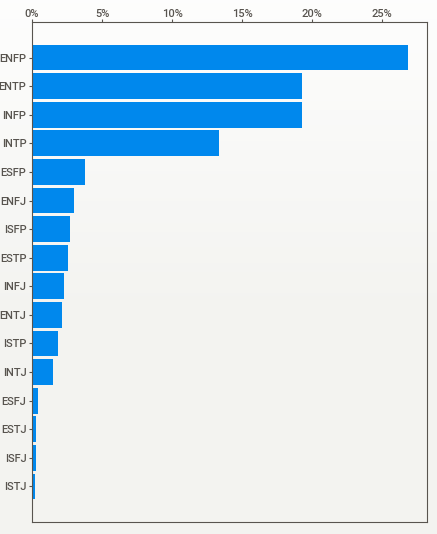

This weird distribution can be explained by the low amount of differing values for some personality representations.<br>
Myers-Briggs personality types work like this: <br><br>
<b>A four letter Abbreviation</b>
<ul>
<li>The first letter means either Introverted or Extraverted</li>
<li>The second letter means either Intuitive or Sensing</li>
<li>The third letter means either Thinking or Feeling</li>
<li>The fourth letter means either Perceiving or Judging</li>
</ul>
<br><br>
The Top 4 of the personality types in the original dataset are:<br>
<b>ENFP, ENTP, INFP and INTP</b><br>
This means:
<ul>
<li>2 Introverted/2 Extraverted</li>
<li>4 Intuitive/0 Sensing</li>
<li>2 Thinking/2 Feeling</li>
<li>4 Perceiving/0 Judging</li>
</ul>

We could synthesize some more data for that to even out these distributions, but both Sensing Score and Judging Score still seem to be very accurate:

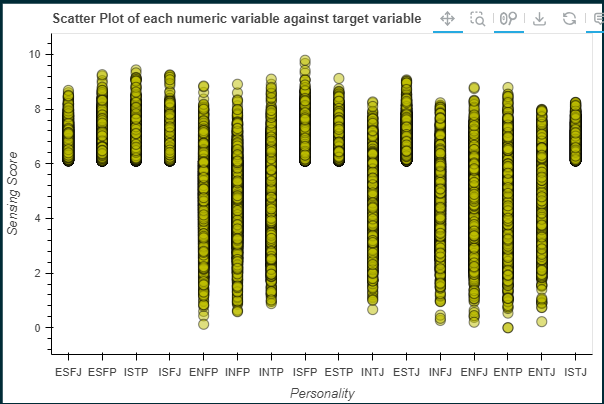

Every personality type with sensing has higher Sensing Scores.

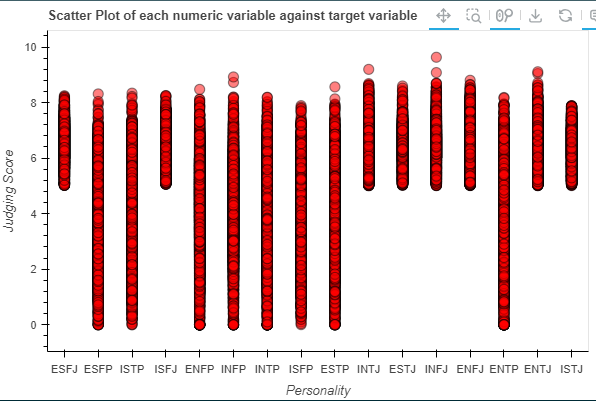

Same goes for Judging Score.

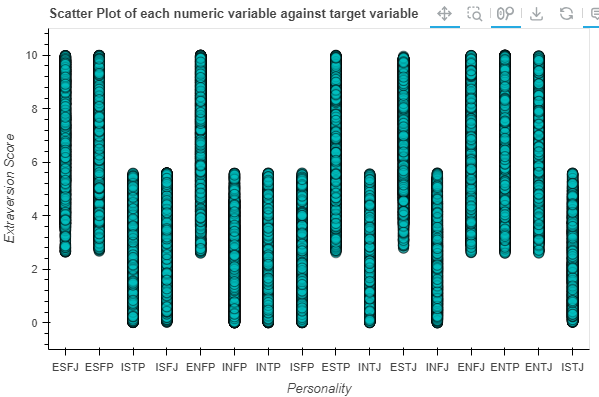

Though we can see that it is not nearly as accurate as Extraversion or Thinking Score.

It is hard to synthesize data in places where no data existed before. This is a problem coming from the original dataset.

### Numerical analyzing

Now let's use forms of analyzing that require numerical values only<br>
We have already cleaned the data, so we can skip all of that.

#### Modeling

In [10]:
# pip install lime
import lime.lime_tabular
import numpy as np
import pandas as pd
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split

# everything else except the target variable
X = df.drop('Personality', axis=1)

# have only the target variable here (dependent variable)
y_temp = df['Personality']

# since we are doing classification, we have to process our target values with an encoder
# and convert them into a categorical TensorFlow/Keras -format 
le = LabelEncoder()
y_enc = le.fit_transform(y_temp)  # Encode target labels

# Split data
X_train, X_test, y_train, y_test = train_test_split(X, y_enc, test_size=0.2, random_state=0)

In [11]:
y_enc

array([ 1,  5,  1, ..., 15, 15, 15])

##### Permutation importance

In [13]:
from sklearn.inspection import permutation_importance
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split

# Train classification model
model = RandomForestClassifier()
model.fit(X_train, y_train)

# Calculate permutation importance
result = permutation_importance(model, X_test, y_test, n_repeats=10, random_state=0)

# Display feature importances
importance = pd.DataFrame({
    'Feature': X.columns,
    'Importance': result.importances_mean
}).sort_values(by='Importance', ascending=False)

print("Permutation Feature Importances:")
print(importance)

Permutation Feature Importances:
         Feature         Importance
5        Thinking Score   0.494258 
3    Extraversion Score   0.471558 
4         Sensing Score   0.413460 
6         Judging Score   0.392496 
2             Education   0.129352 
0                   Age   0.126222 
1                isMale   0.082339 
9       Interest_Sports   0.048014 
7         Interest_Arts   0.023050 
8       Interest_Others   0.005682 
10  Interest_Technology   0.004477 


#### Findings

##### Importance

The permutation importance mostly reinstates our most recent claim. All of the interests are the least imporant variables, though Interest in Sports is higher than the rest.<br>
Considering this, we will drop all the unneeded Interests.

## Modifying data

First, let's drop unneeded variables.

In [16]:
interests = ["Interest_Arts", "Interest_Others", "Interest_Technology"]
df = df.drop(interests, axis=1)

While we're at it, let's rename 'Interest_Sports' to be readable.

In [17]:
df = df.rename({'Interest_Sports':'LikesSport'}, axis=1)

In [18]:
df.head()

,Age,isMale,Education,Extraversion Score,Sensing Score,Thinking Score,Judging Score,Personality,LikesSport
0,19.0,1,0,9.47080,7.141434,6.03696,4.360278,ENFP,0
1,27.0,0,0,5.85392,6.160195,0.80552,4.221421,ESFP,1
2,21.0,0,0,7.08615,3.388433,2.66188,5.127320,ENFP,0
3,28.0,1,0,2.01892,4.823624,7.30625,5.986550,INTP,0
4,36.0,0,1,9.91703,4.755080,5.31469,4.677213,ENFP,0


Since we already have a large amount of data and age has a weird distribution, we will cap it.

Let's just keep the dominating ages.

In [23]:
df_filtered = df[(df['Age'] >= 20) & (df['Age'] <= 34)]

In [24]:
df_filtered.count()

Age                   498341
isMale                498341
Education             498341
Extraversion Score    498341
Sensing Score         498341
Thinking Score        498341
Judging Score         498341
Personality           498341
LikesSport            498341
dtype: int64

Ok let's save this again.

In [25]:
df_filtered.to_csv("../data/dataSynthCleanCapped.csv")